In [14]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [15]:
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
df[["job_title_short", "job_skills"]].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [17]:
df_exploded = df.explode("job_skills")

<Axes: ylabel='job_skills'>

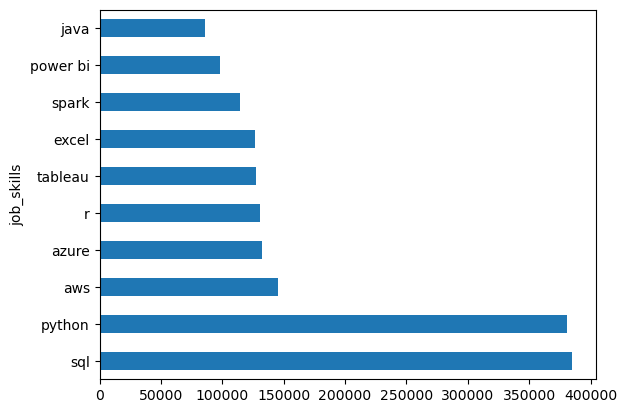

In [18]:
df_exploded["job_skills"].value_counts().head(10).plot(kind = "barh")

In [22]:
df["job_skills"]

0                                                      None
1                [r, python, sql, nosql, power bi, tableau]
2         [python, sql, c#, azure, airflow, dax, docker,...
3         [python, c++, java, matlab, aws, tensorflow, k...
4         [bash, python, oracle, aws, ansible, puppet, j...
                                ...                        
785736    [bash, python, perl, linux, unix, kubernetes, ...
785737                               [sas, sas, sql, excel]
785738                                  [powerpoint, excel]
785739    [python, go, nosql, sql, mongo, shell, mysql, ...
785740                                          [aws, flow]
Name: job_skills, Length: 785741, dtype: object

In [27]:
df_exploded = df.explode("job_skills")

<Axes: ylabel='job_skills'>

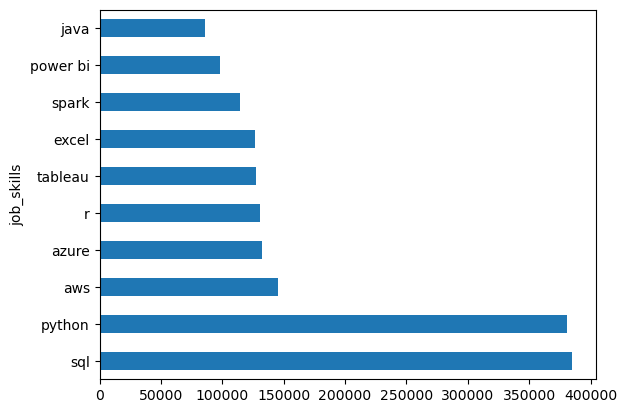

In [34]:
df_exploded["job_skills"].value_counts(ascending= False).head(10).plot(kind = "barh")

In [42]:
skills = df_exploded.groupby(["job_title_short", "job_skills"]).size()

In [44]:
type(skills)

pandas.core.series.Series

In [49]:
new_skills = skills.reset_index(name = "skill")

In [53]:
new_skills

,job_title_short,job_skills,skill
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [58]:
new_skills = new_skills.sort_values(by = "skill", ascending= False)

In [72]:

data_analyst = new_skills[new_skills["job_title_short"] == "Data Scientist"].head(20)

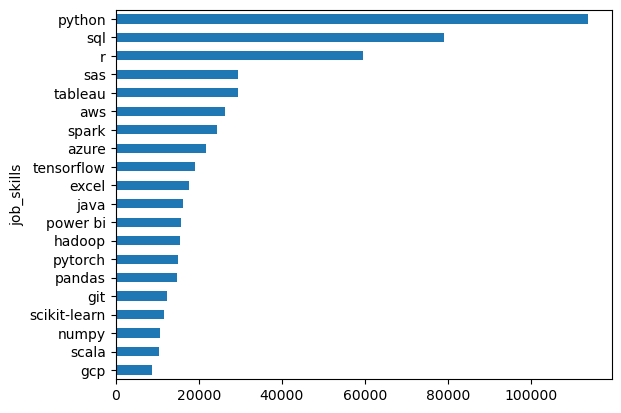

In [74]:
data_analyst.plot(kind = "barh", x = "job_skills", y = "skill" )
plt.gca().invert_yaxis()
plt.legend().set_visible(False)